# Data Loading and Preparation
In this notebook we show: 
- How to use our data loader implementation specifically built for the DeftCorpus dataset ?
- How we prepared the DeftCorpus dataset for usage for Sentence Definition Classification ?

In [39]:
#imports cell
import pandas as pd
from source.data_loader import DeftCorpusLoader

## Loading dataset for classification using DeftCorpusLoader

Possible Steps for Class Usages:

- Create instance of the class, with the path to your **"data" folder** from "deft_corpus" folder.


- Call `load_classification_data` on class instance with **no arguments passed**, this will create two folders in "deft_files" folder by default including the re-formatted for classification task. Then will load these files and return two dataframes. The two dataframes include two splits, a training split and a development split (used for testing purposes during Training phase of Competition)


- Alternatively, you can call `convert_to_classififcation_format` on class instance with **no arguments passed or pass arguments to specify folders and not use defaults** to first convert and create the two folders. The, call `load_classification_data` with the folders paths created from by the first method. This alternative way is provided for those who intend to work with **their own folder paths rather than the provided defaults.**

*In this notebook, we use the rather easier and preferred method one.*

In [2]:
deft_loader = DeftCorpusLoader("deft_corpus/data")
trainframe, devframe = deft_loader.load_classification_data()

### Exploring dataset 
- There are two columns: `Sentence` which has the sentence text, `HasDef` boolean value to determine whether it is a definition or not. 
- There are **18,157 instances for training** and **865 instances for development** (testing purposes here)

In [3]:
deft_loader.explore_data(trainframe, "train")
deft_loader.explore_data(devframe, "dev")


Head of  train  Dataframe:
                                            Sentence  HasDef
0   3918 . You may recall that 6 x 6 = 36 , 6 x 7...       0
1   Memorizing these facts is rehearsal . Another...       1
2   Chunking is useful when trying to remember in...       0
3   3921 . Use elaborative rehearsal : In a famou...       1
4      Their theory is called levels of processing .       0
Number of instances of  train is 18157

Head of  dev  Dataframe:
                                            Sentence  HasDef
0   309 . Both photosystems have the same basic s...       1
1   Each photosystem is serviced by the light - h...       0
2   The absorption of a single photon or distinct...       0
3   390 . Mistakes in the duplication or distribu...       0
4   To prevent a compromised cell from continuing...       0
Number of instances of  dev is 865


### Exploring classes and classification problem
- There are **12,143 instances** of class label `0` ---> `This sentence is not a definition`.
- There are **6,014 instances** of class label `1` ---> `This sentence is a definition`.
- Determining problem: **Binary Classification Problem.**
- A clear **classes imbalance** case exists in our data. 

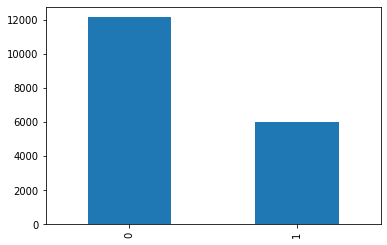

In [35]:
trainframe.HasDef.value_counts().plot.bar()

## Preprocessing dataset using Spacy
- Tokenizing corpus sentences into word tokens.
- Lemmatization of each token. 
- Lowercase each token. 
- Removing stop words, punctuations, spaces and non alphanumeric characters.
- Adds a column on the dataframe for preprocessed tokens according to above rules.

In [5]:
deft_loader.preprocess_data(trainframe)
trainframe

,Sentence,HasDef,Parsed
0,"3918 . You may recall that 6 x 6 = 36 , 6 x 7...",0,"[recall, x, x, x]"
1,Memorizing these facts is rehearsal . Another...,1,"[memorizing, fact, rehearsal, strategy, chunk,..."
2,Chunking is useful when trying to remember in...,0,"[chunking, useful, try, remember, information,..."
3,3921 . Use elaborative rehearsal : In a famou...,1,"[use, elaborative, rehearsal, famous, article,..."
4,Their theory is called levels of processing .,0,"[theory, call, level, process]"
...,...,...,...
18152,The term culture refers to all of the beliefs...,1,"[term, culture, refer, belief, custom, art, tr..."
18153,Culture is transmitted to people through lang...,0,"[culture, transmit, people, language, model, c..."
18154,4306 . Another method for assessment of perso...,0,"[method, assessment, personality, projective, ..."
18155,This kind of test relies on one of the defens...,1,"[kind, test, rely, defense, mechanism, propose..."


In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn import tree
classifier = LogisticRegression()
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
parser = English()

# Create pipeline using Bag of Words
pipe = Pipeline([('vectorizer', CountVectorizer(tokenizer = _spacy_preprocessor)),
                 ('classifier', classifier)])


In [50]:
pipe.fit(trainframe["Sentence"], trainframe["HasDef"])

/home/zawawy/Public/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
         steps=[('vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<function _spacy_preprocessor at 0x7f0afcc91440>,
                                 vocabulary=None)),
                ('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
     

In [51]:
from sklearn import metrics
# Predicting with a test dataset
predicted = pipe.predict(devframe["Sentence"])
y_test = devframe["HasDef"]
# Model Accuracy
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test, predicted))
print("Logistic Regression Precision:",metrics.precision_score(y_test, predicted))
print("Logistic Regression Recall:",metrics.recall_score(y_test, predicted))

Logistic Regression Accuracy: 0.7572254335260116
Logistic Regression Precision: 0.6743119266055045
Logistic Regression Recall: 0.513986013986014
